In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rc('legend',fontsize=14)

In [18]:
chain1 = pd.read_csv("../chains/DES_wlwl_Nzs_TAP_0.6/chain_1.csv")
chain2 = pd.read_csv("../chains/DES_wlwl_Nzs_TAP_0.6/chain_1.csv")
chain3 = pd.concat([chain1, chain2])
path = "../chains/DES_wlwl_Nzs_TAP_0.6/"
os.path.isfile(path+"chain_{}.csv".format(1))

True

In [27]:
def add_chains(path):
    chains = []
    i = 1 
    while os.path.isfile(path+"chain_{}.csv".format(i)):
        chain = pd.read_csv(path+"chain_{}.csv".format(i))
        chains.append(chain)
        i += 1
    return pd.concat(chains)

In [28]:
wlwl_Nz10 = add_chains("../chains/DES_wlwl_Nzs_TAP_0.6/")

In [107]:
wlwl_Nz10.keys()[2:-12]

Index(['Ωm', 'Ωb', 'h', 'ns', 's8', 'A_IA', 'alpha_IA', 'DESwl__0_e_nz[1]',
       'DESwl__0_e_nz[2]', 'DESwl__0_e_nz[3]', 'DESwl__0_e_nz[4]',
       'DESwl__0_e_nz[5]', 'DESwl__0_e_nz[6]', 'DESwl__0_e_nz[7]',
       'DESwl__0_e_nz[8]', 'DESwl__0_e_nz[9]', 'DESwl__0_e_nz[10]',
       'DESwl__1_e_nz[1]', 'DESwl__1_e_nz[2]', 'DESwl__1_e_nz[3]',
       'DESwl__1_e_nz[4]', 'DESwl__1_e_nz[5]', 'DESwl__1_e_nz[6]',
       'DESwl__1_e_nz[7]', 'DESwl__1_e_nz[8]', 'DESwl__1_e_nz[9]',
       'DESwl__1_e_nz[10]', 'DESwl__2_e_nz[1]', 'DESwl__2_e_nz[2]',
       'DESwl__2_e_nz[3]', 'DESwl__2_e_nz[4]', 'DESwl__2_e_nz[5]',
       'DESwl__2_e_nz[6]', 'DESwl__2_e_nz[7]', 'DESwl__2_e_nz[8]',
       'DESwl__2_e_nz[9]', 'DESwl__2_e_nz[10]', 'DESwl__3_e_nz[1]',
       'DESwl__3_e_nz[2]', 'DESwl__3_e_nz[3]', 'DESwl__3_e_nz[4]',
       'DESwl__3_e_nz[5]', 'DESwl__3_e_nz[6]', 'DESwl__3_e_nz[7]',
       'DESwl__3_e_nz[8]', 'DESwl__3_e_nz[9]', 'DESwl__3_e_nz[10]',
       'DESwl__0_e_m', 'DESwl__1_e_m', 'DESwl__2_

In [143]:
labels_dict = {'n': '\eta',
               'l': 'l',
               'h': 'h',
               'Ωm': '\Omega_m',
               'Ωb': '\Omega_b',
               'ns': 'n_s',
               's8': '\sigma_8',
               'A_IA': 'A_{IA}',
               'alpha_IA': r'\alpha_{IA}',
               'DESwl__0_e_m': 'm_{DESY1 \, 0 }',
               'DESwl__1_e_m': 'm_{DESY1 \, 1 }',
               'DESwl__2_e_m': 'm_{DESY1 \, 2 }', 
               'DESwl__3_e_m': 'm_{DESY1 \, 3 }'}

In [144]:
def make_chain(file, label, ranges=dict({})):
    params = np.array(wlwl_Nz10.keys()[2:-12])
    names = []
    labels = []
    samples = []
    for param in params:
        if param in labels_dict.keys():
            names.append(param) 
            labels.append(labels_dict[param]) 
            samples.append(file[param])

    names = np.array(names)
    labels = np.array(labels)
    samples = np.transpose(np.array(samples))

    return MCSamples(samples=samples, names=names, labels=labels, label=label, ranges=ranges,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.4, 'smooth_scale_1D':0.3})
    

In [145]:
wlwl_Nz10_samples = make_chain(wlwl_Nz10, r"$DESY1 WL Nz 10$")

Removed no burn in


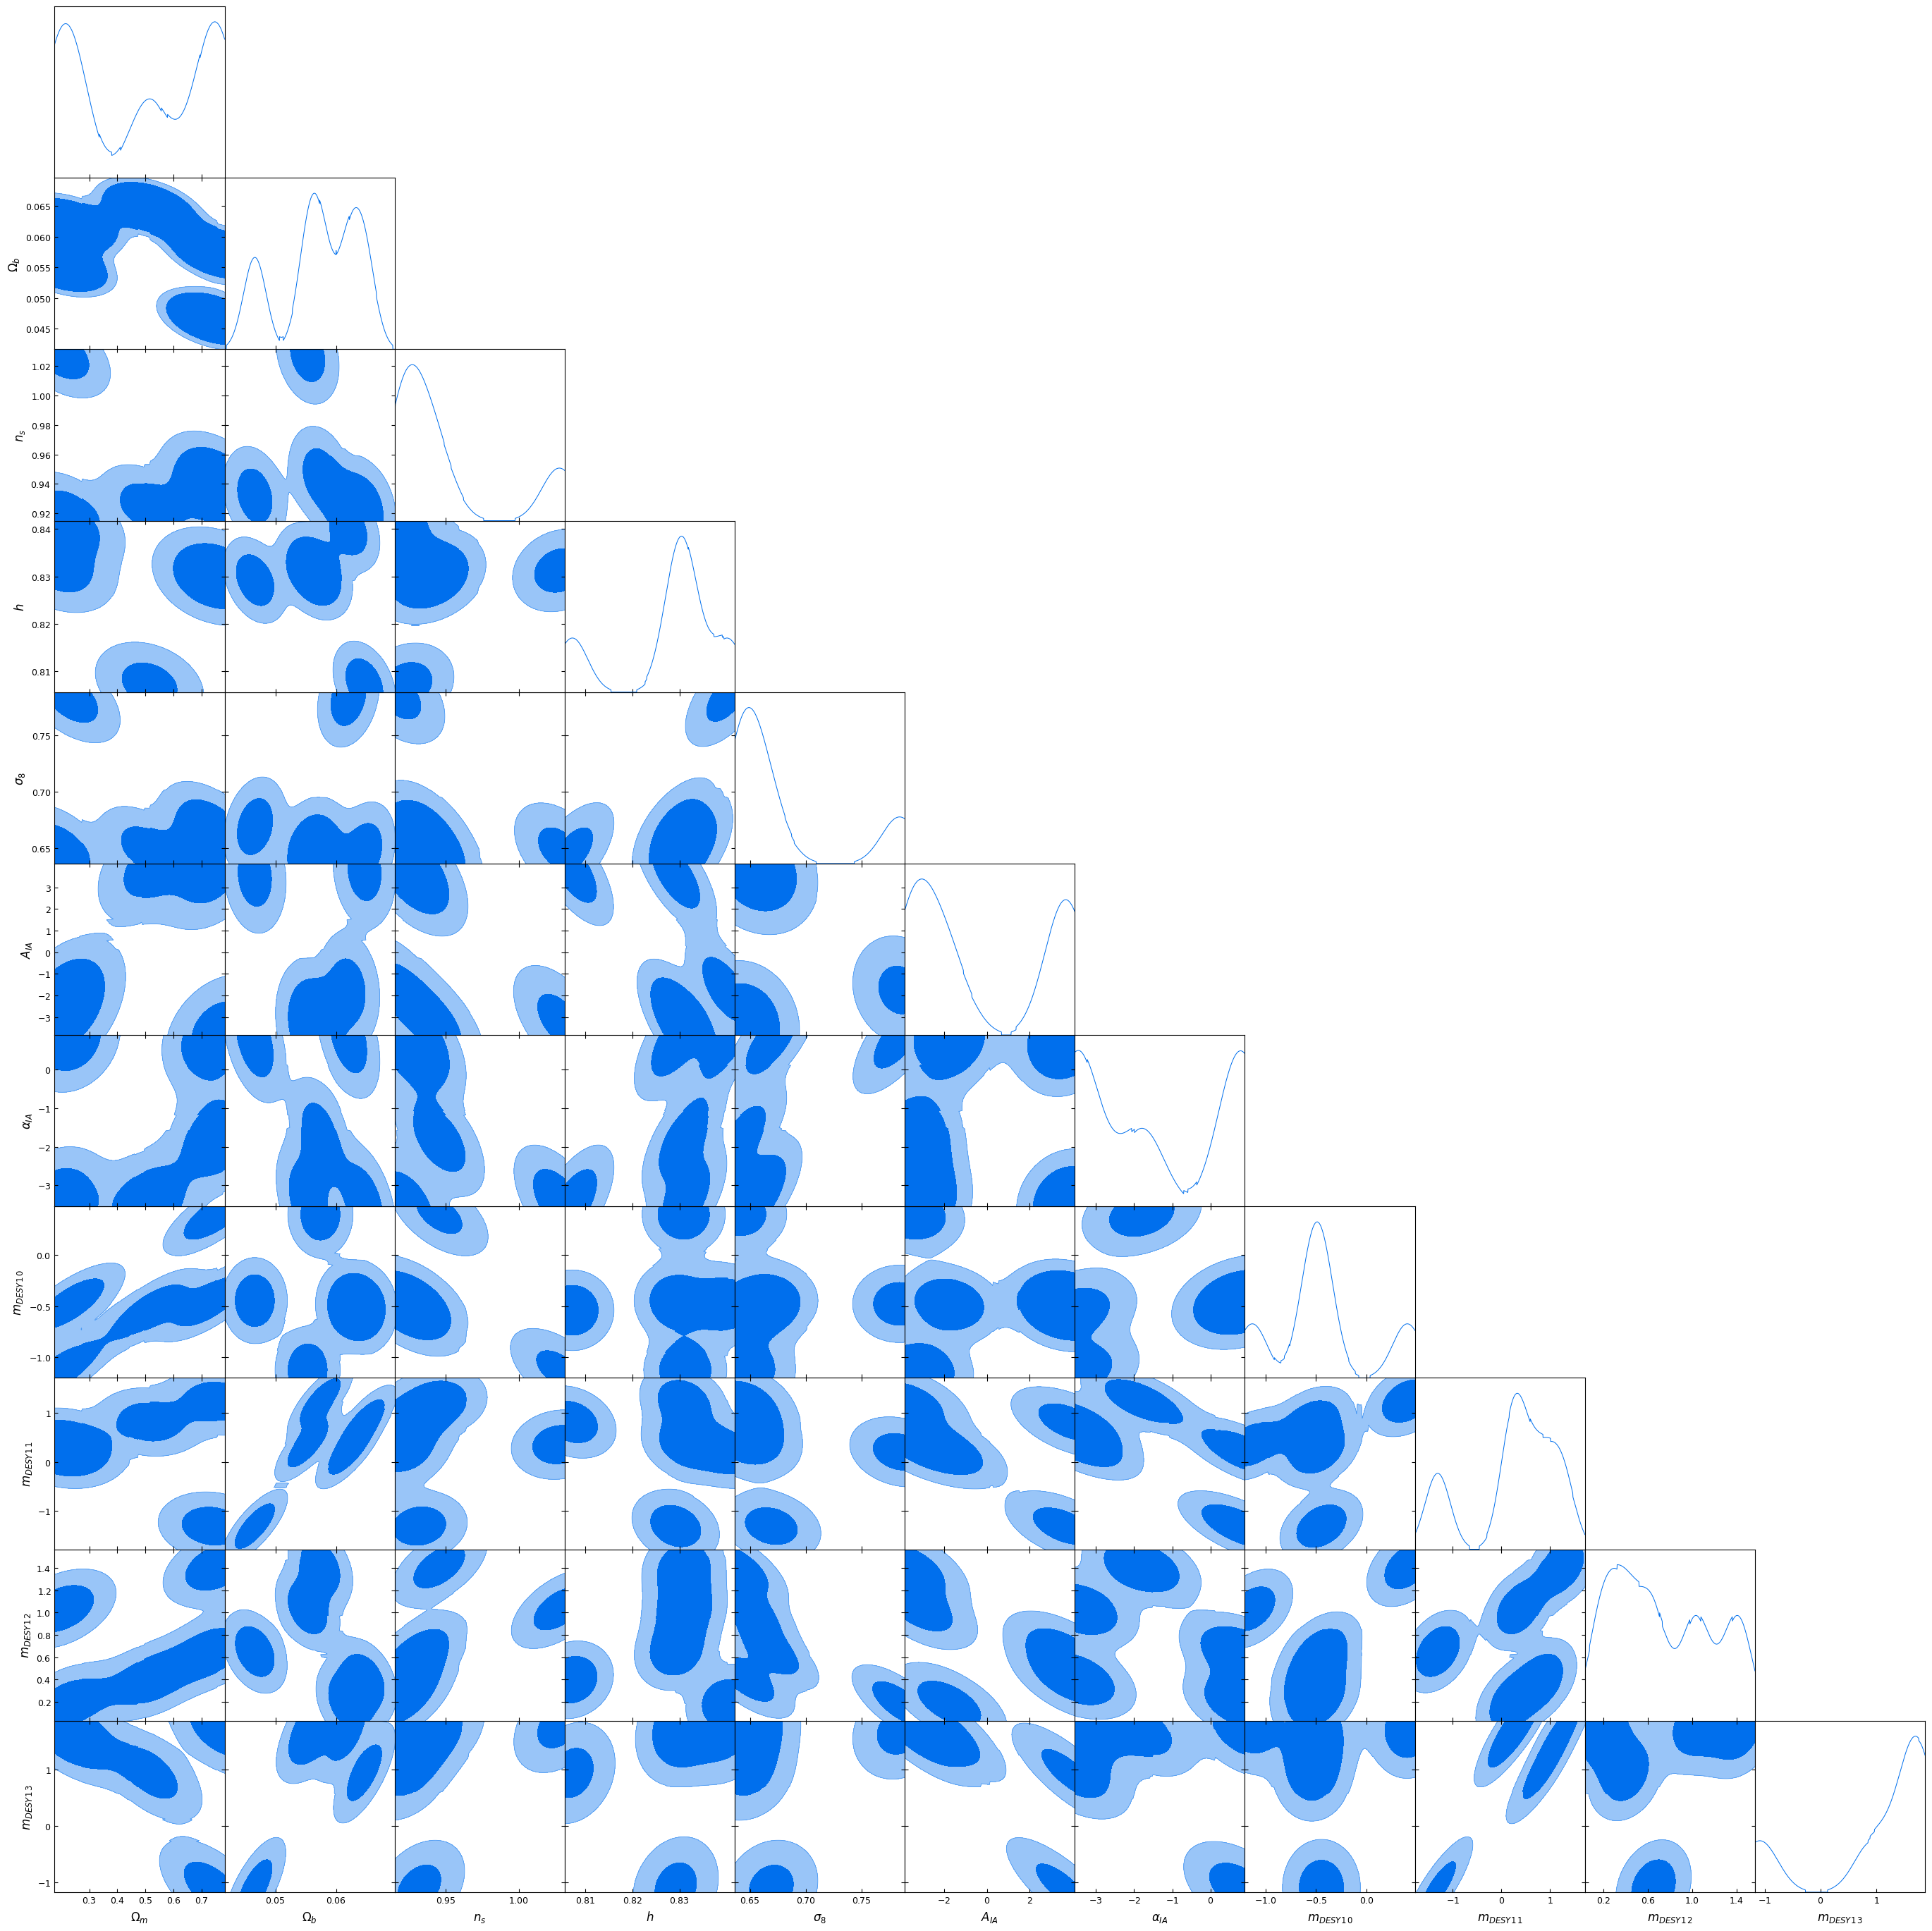

In [147]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot(wlwl_Nz10_samples, ['Ωm', 'Ωb', 'ns', 'h', 's8',
                                    'A_IA', 'alpha_IA',
                                    'DESwl__0_e_m',  'DESwl__1_e_m', 'DESwl__2_e_m',  'DESwl__3_e_m'], filled=True)